<div style="border-radius: 30px; border: 3px solid #000000; padding: 10px; background-color: #3C3139; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 15px;">🚀 Exciting Adventures in Cat and Dog Classification with VGG16 Transfer Learning 🐱🐶</h1>
</div>


![](https://th.bing.com/th/id/OIG1.lISUStruzIvzTZUvLqor?pid=ImgGn)

<div style="border-radius: 20px 20px 40px 40px; border: 3px solid #000000; padding: 7px; background-color: #3C3139; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 15px;"> 📚 Loading Dependencies</h1>
</div>


In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.utils import image_dataset_from_directory
from keras.utils import plot_model
from keras.applications import ResNet50, VGG16
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from PIL import Image
import random
import time
import warnings
warnings.filterwarnings('ignore')

2024-06-01 21:30:28.022787: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-01 21:30:28.022897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-01 21:30:28.112975: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<div style="border-radius: 20px 20px 40px 40px; border: 3px solid #000000; padding: 7px; background-color: #3C3139; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 15px;"> 🔎 Dive-in & 📊 Visualization</h1>
</div>


In [2]:
train_path = '/kaggle/input/dogs-vs-cats/train'
test_path = '/kaggle/input/dogs-vs-cats/test'

In [3]:
def count_files_in_folders(base_path):
    folder_data = []
    if not os.path.exists(base_path):
        print(f"The path {base_path} does not exist.")
        return folder_data
    
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        if os.path.isdir(folder_path):
            num_files = 0
            for item in os.listdir(folder_path):
                if os.path.isfile(os.path.join(folder_path, item)):
                    num_files += 1
            folder_data.append((folder, num_files))
    
    return folder_data

In [4]:
train_data = count_files_in_folders(train_path)
test_data = count_files_in_folders(test_path)

In [5]:
# Convert to DataFrame
train_df = pd.DataFrame(train_data, columns=['Folder', 'NumFiles'])
test_df = pd.DataFrame(test_data, columns=['Folder', 'NumFiles'])

# Add a column to distinguish between train and test data
train_df['Type'] = 'Train'
test_df['Type'] = 'Test'

# Combine the data
combined_df = pd.concat([train_df, test_df])

In [6]:
combined_df

,Folder,NumFiles,Type
0,dogs,10000,Train
1,cats,10000,Train
0,dogs,2500,Test
1,cats,2500,Test


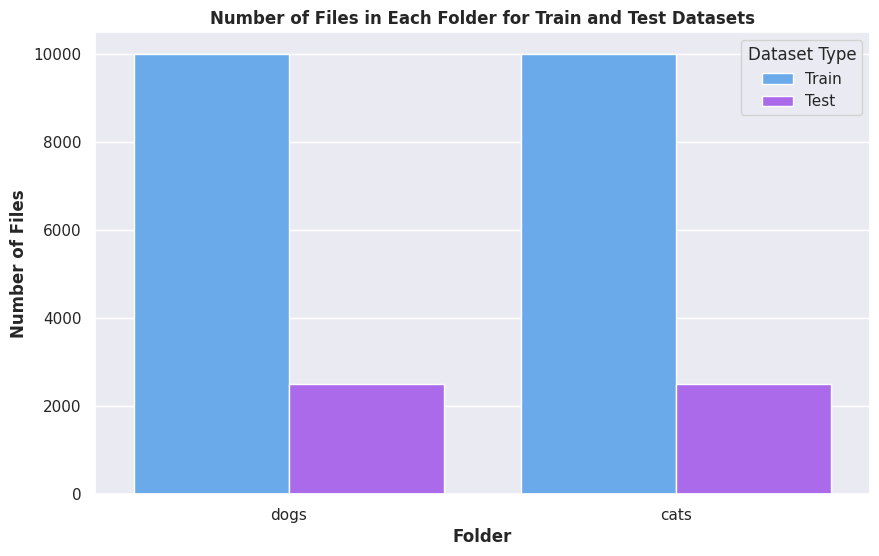

In [7]:
# Plotting
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Folder', y='NumFiles', hue='Type', data=combined_df, palette= 'cool')
plt.title('Number of Files in Each Folder for Train and Test Datasets', fontweight = 'bold')
plt.xlabel('Folder',fontweight = 'semibold')
plt.ylabel('Number of Files', fontweight = 'semibold')
plt.legend(title='Dataset Type')
plt.show()

In [8]:
def load_sample_images(folder_path, sample_size=5):
    images = []
    if not os.path.exists(folder_path):
        print(f"The path {folder_path} does not exist.")
        return images
    
    all_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    sample_files = random.sample(all_files, sample_size)
    
    for file in sample_files:
        img_path = os.path.join(folder_path, file)
        img = Image.open(img_path)
        images.append(img)
    
    return images

In [9]:
# Defining the paths
cat_folder_path = '/kaggle/input/dogs-vs-cats/train/cats'
dog_folder_path = '/kaggle/input/dogs-vs-cats/train/dogs'

In [10]:
cat_images = load_sample_images(cat_folder_path)
dog_images = load_sample_images(dog_folder_path)

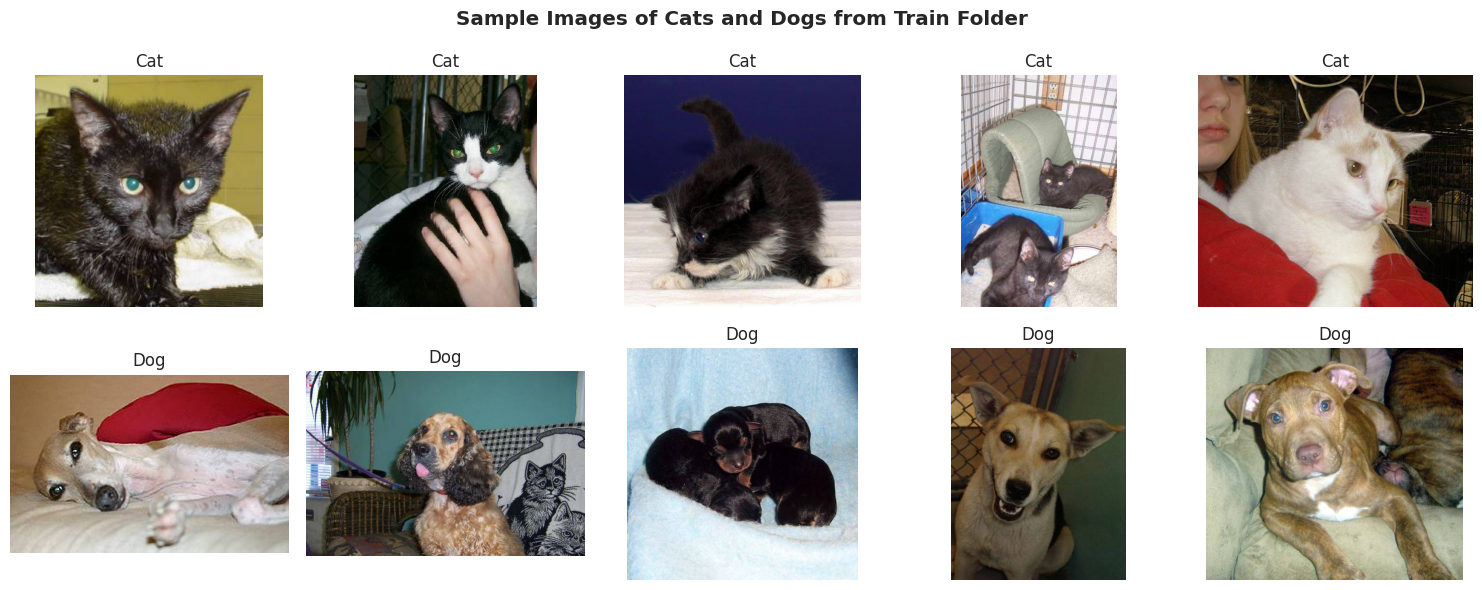

In [11]:
num_images = len(cat_images) + len(dog_images)
fig, axes = plt.subplots(2, len(cat_images), figsize=(15, 6))

# Plot cat images
for i, img in enumerate(cat_images):
    axes[0, i].imshow(img)
    axes[0, i].set_title('Cat')
    axes[0, i].axis('off')

# Plot dog images
for i, img in enumerate(dog_images):
    axes[1, i].imshow(img)
    axes[1, i].set_title('Dog')
    axes[1, i].axis('off')

plt.suptitle('Sample Images of Cats and Dogs from Train Folder', fontweight='bold')
plt.tight_layout()
plt.show()

<div style="border-radius: 20px 20px 40px 40px; border: 3px solid #000000; padding: 7px; background-color: #3C3139; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 15px;">🔍 Data Exploration and Preparation 📋</h1>
</div>


In [12]:
train_ds = image_dataset_from_directory(
    directory = train_path,
    labels = 'inferred',
    label_mode = 'binary',
    batch_size = 32,
    image_size=(224,224)
)

validation_ds = image_dataset_from_directory(
    directory = test_path,
    labels = 'inferred',
    label_mode = 'binary',
    batch_size = 32,
    image_size=(224,224)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
print(train_ds.class_names)
print(validation_ds.class_names)

['cats', 'dogs']
['cats', 'dogs']


In [14]:
def normalize_img(img, label):
    image = tf.cast(img/255. ,tf.float32)
    return image,label

In [15]:
train_ds = train_ds.map(normalize_img)
validation_ds = validation_ds.map(normalize_img)

<div style="border-radius: 20px 20px 40px 40px; border: 3px solid #000000; padding: 7px; background-color: #3C3139; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 15px;">🚀 Applying VGG16 Transfer Learning</h1>
</div>


In [16]:
base_model_vgg = VGG16(
    input_shape = (224, 224, 3),
    include_top = False,
    weights= 'imagenet'
)

base_model_vgg.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
x_vgg = base_model_vgg.output
x_vgg = Flatten()(x_vgg)
x_vgg = Dense(56, activation='sigmoid')(x_vgg)
x_vgg = Dropout(0.1)(x_vgg)
x_vgg = Dense(1, activation='sigmoid')(x_vgg)

# Create the new model
model_vgg = Model(inputs=base_model_vgg.input, outputs=x_vgg)

# VGG16
 Total params: 14,743,473 (56.24 MB)<br>
 Trainable params: 28,785 (112.44 KB)<br>
 Non-trainable params: 14,714,688 (56.13 MB)<br>

In [18]:
model_vgg.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [19]:
history = model_vgg.fit(train_ds, validation_data = validation_ds, epochs = 10)

Epoch 1/10
  1/625 ━━━━━━━━━━━━━━━━━━━━ 5:46:39 33s/step - accuracy: 0.5000 - loss: 0.7284

I0000 00:00:1717277536.267491      83 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717277536.289049      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.8505 - loss: 0.3533

W0000 00:00:1717277619.804773      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 183ms/step - accuracy: 0.8506 - loss: 0.3532 - val_accuracy: 0.9316 - val_loss: 0.1779
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 170ms/step - accuracy: 0.9417 - loss: 0.1589 - val_accuracy: 0.9326 - val_loss: 0.1673
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 170ms/step - accuracy: 0.9520 - loss: 0.1296 - val_accuracy: 0.9348 - val_loss: 0.1564
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 170ms/step - accuracy: 0.9602 - loss: 0.1069 - val_accuracy: 0.9342 - val_loss: 0.1597
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 170ms/step - accuracy: 0.9646 - loss: 0.0988 - val_accuracy: 0.9366 - val_loss: 0.1566
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 169ms/step - accuracy: 0.9663 - loss: 0.0970 - val_accuracy: 0.9346 - val_loss: 0.1718
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 169ms/step - accuracy: 0.9717 - loss: 0.0802 - val_accuracy: 0.9322 - val_loss: 0.1685
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 170ms/step - accuracy: 0.9742 - loss: 0.07

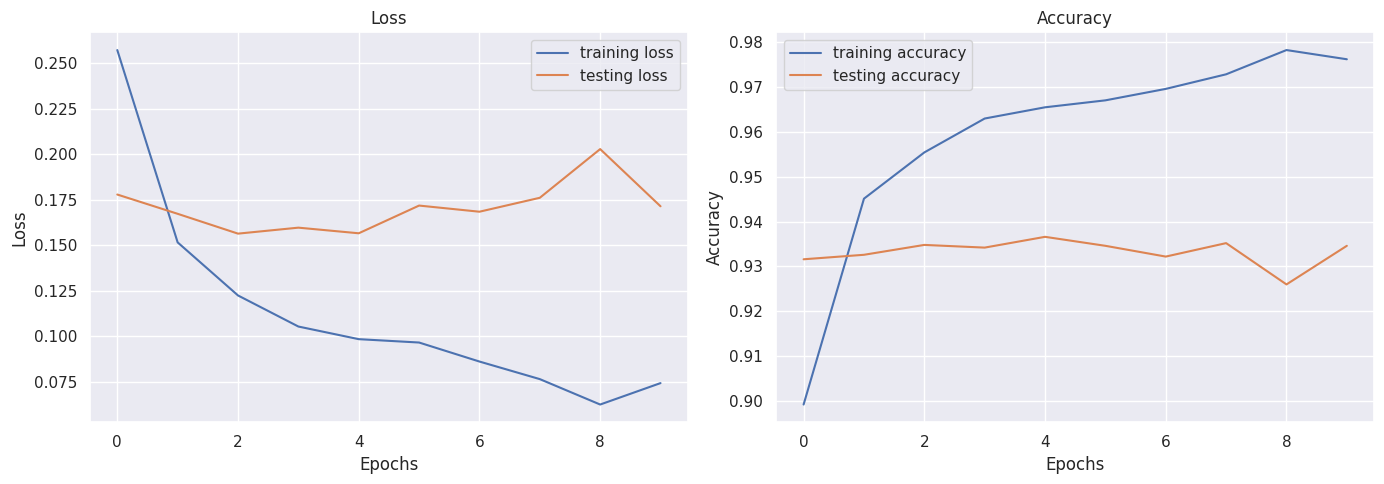

In [20]:
fig, axes = plt.subplots(1,2 , figsize =(14, 5))

sns.lineplot(ax = axes[0], data = history.history['loss'], label = 'training loss' )
sns.lineplot(ax= axes[0], data = history.history['val_loss'], label = 'testing loss')
axes[0].set_title('Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

sns.lineplot(ax = axes[1], data = history.history['accuracy'], label = 'training accuracy')
sns.lineplot(ax = axes[1], data = history.history['val_accuracy'], label = 'testing accuracy')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

<div style="border-radius: 20px 20px 40px 40px; border: 3px solid #000000; padding: 7px; background-color: #3C3139; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 15px;">📉 Model Prognostication and Evaluation</h1>
</div>



In [21]:
def process_image(img, target_size=(224, 224)):
    # If img is a path, load the image
    if isinstance(img, str):
        img = image.load_img(img, target_size=target_size)
    else:
        # If img is a PIL image, resize it
        img = img.resize(target_size)
    
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array


In [22]:
cat_test_path = '/kaggle/input/dogs-vs-cats/test/cats'
dog_test_path = '/kaggle/input/dogs-vs-cats/test/dogs'

In [23]:
cat_img = load_sample_images(cat_test_path)
dog_img = load_sample_images(dog_test_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


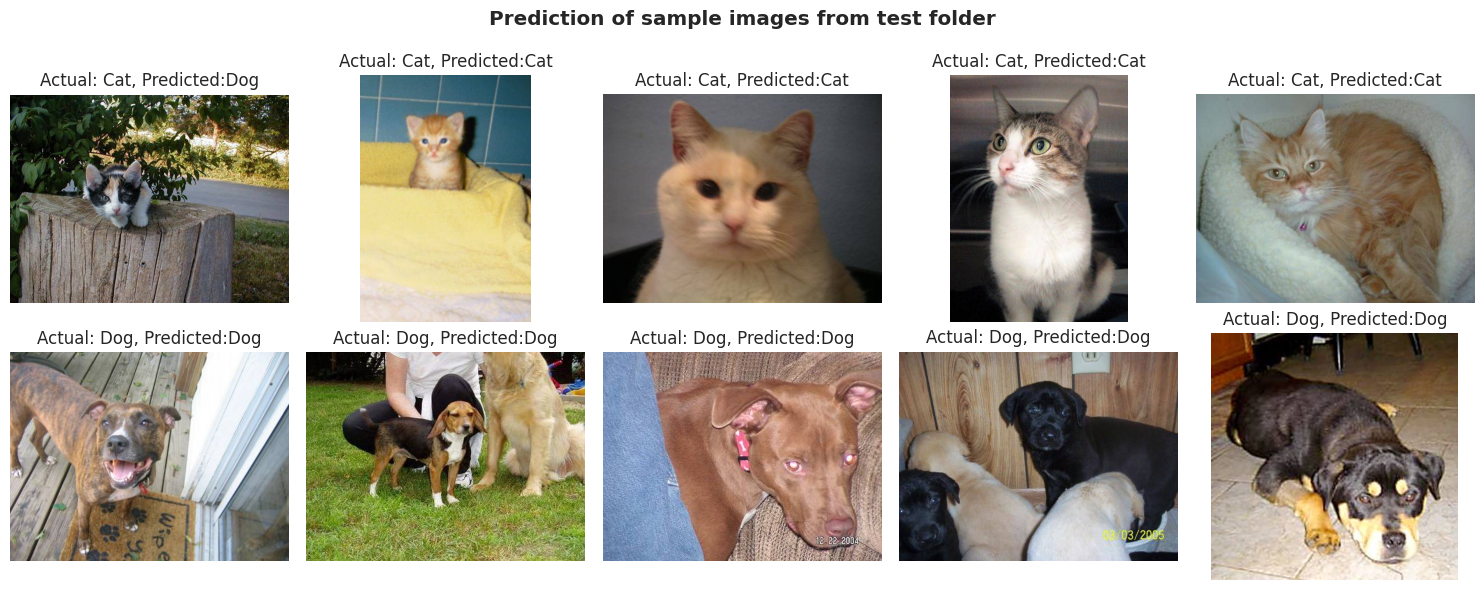

In [24]:
fig, axes = plt.subplots(2,len(cat_img), figsize =(15,6))

for i, img in enumerate(cat_img):
    preprocessed_img = process_image(img)
    pred = model_vgg.predict(preprocessed_img)
    if pred[0] > 0.5:
        predicted_class = 'Dog'
    else:
        predicted_class = 'Cat'
    
    axes[0,i].imshow(img)
    axes[0,i].set_title(f'Actual: Cat, Predicted:{predicted_class}')
    axes[0, i].axis('off')

for i, img in enumerate(dog_img):
    preprocessed_img = process_image(img)
    pred = model_vgg.predict(preprocessed_img)
    if pred[0] > 0.5:
        predicted_class = 'Dog'
    else:
        predicted_class = 'Cat'
    
    axes[1,i].imshow(img)
    axes[1,i].set_title(f'Actual: Dog, Predicted:{predicted_class}')
    axes[1, i].axis('off')

    
plt.suptitle('Prediction of sample images from test folder', fontweight='bold')
plt.tight_layout()
plt.show()

In [25]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model_vgg.evaluate(validation_ds)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")



157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.9335 - loss: 0.1744
Validation Loss: 0.17142973840236664
Validation Accuracy: 0.9345999956130981


<div style="border-radius: 20px 20px 40px 40px; border: 3px solid #000000; padding: 7px; background-color: #3C3139; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 15px;">🌈 Thank You for Your Time and Attention! 😊 Your Upvote Would Mean a Lot</h1>
</div>


